In [1]:
###############################################################################
#                              Importing required Libraries                    #
###############################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold 
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
import xgboost as xgb
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import precision_recall_fscore_support as f1
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
##pip install xgboost

In [3]:
###############################################################################
#                              Ingesting data as csv file 
###############################################################################
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:

data = data.drop(['time'], axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [5]:
corr = data.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


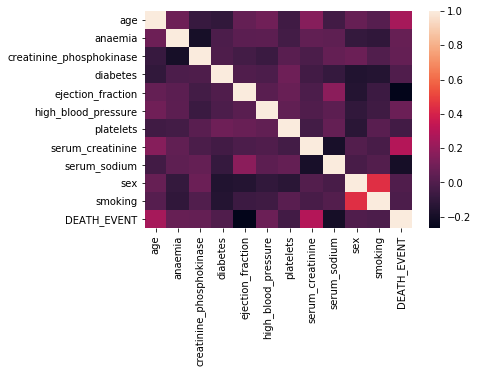

In [6]:
sns.heatmap(corr)

In [7]:
###############################################################################
#                              correlated features identification 
###############################################################################
correlated_features = set()
correlation_matrix = data.drop('DEATH_EVENT', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            
correlated_features

set()

In [8]:
###############################################################################
#                      Dimensionality reduction using RFECV 
###############################################################################
X = data.drop('DEATH_EVENT', axis=1)
target = data['DEATH_EVENT']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features: 6


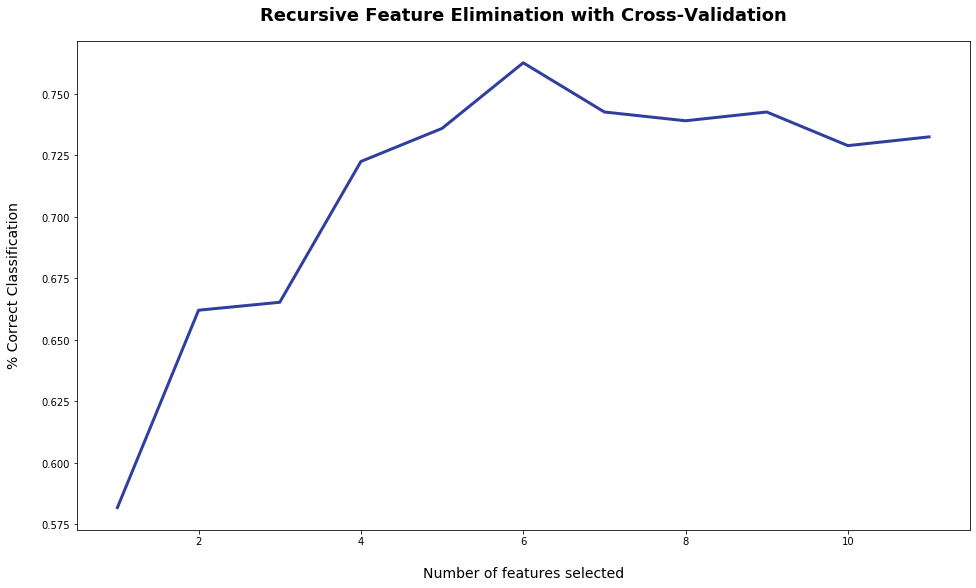

In [9]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [10]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  3  5  9 10]


In [11]:
rfecv.estimator_.feature_importances_

array([0.16105185, 0.15512285, 0.19164005, 0.15285816, 0.22456517,
       0.11476192])

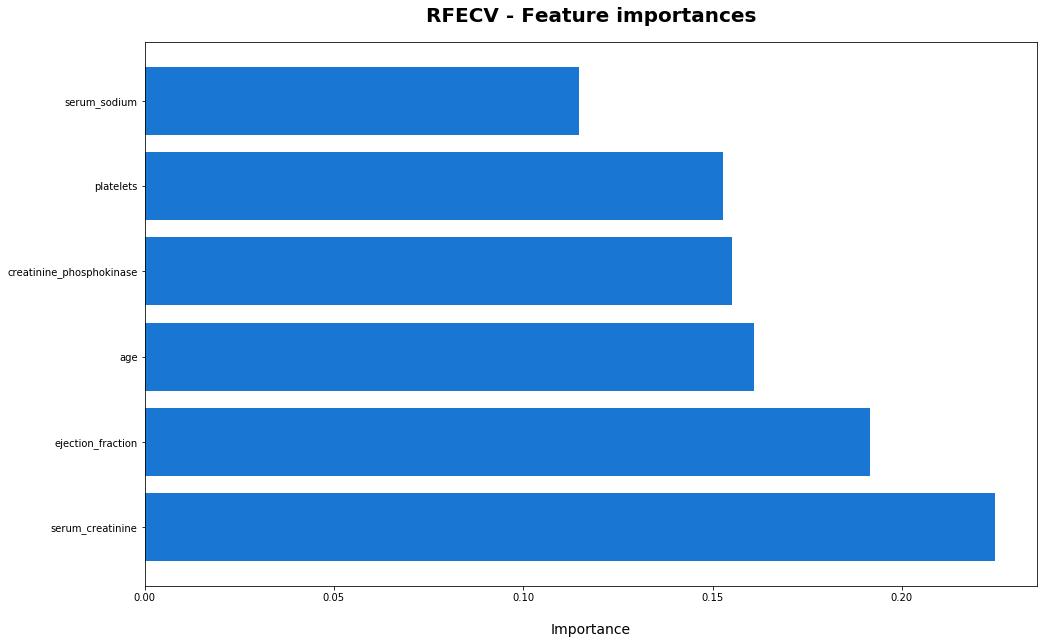

In [12]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [13]:
y = target
print(X.columns)
X.shape, y.shape

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')


((299, 6), (299,))

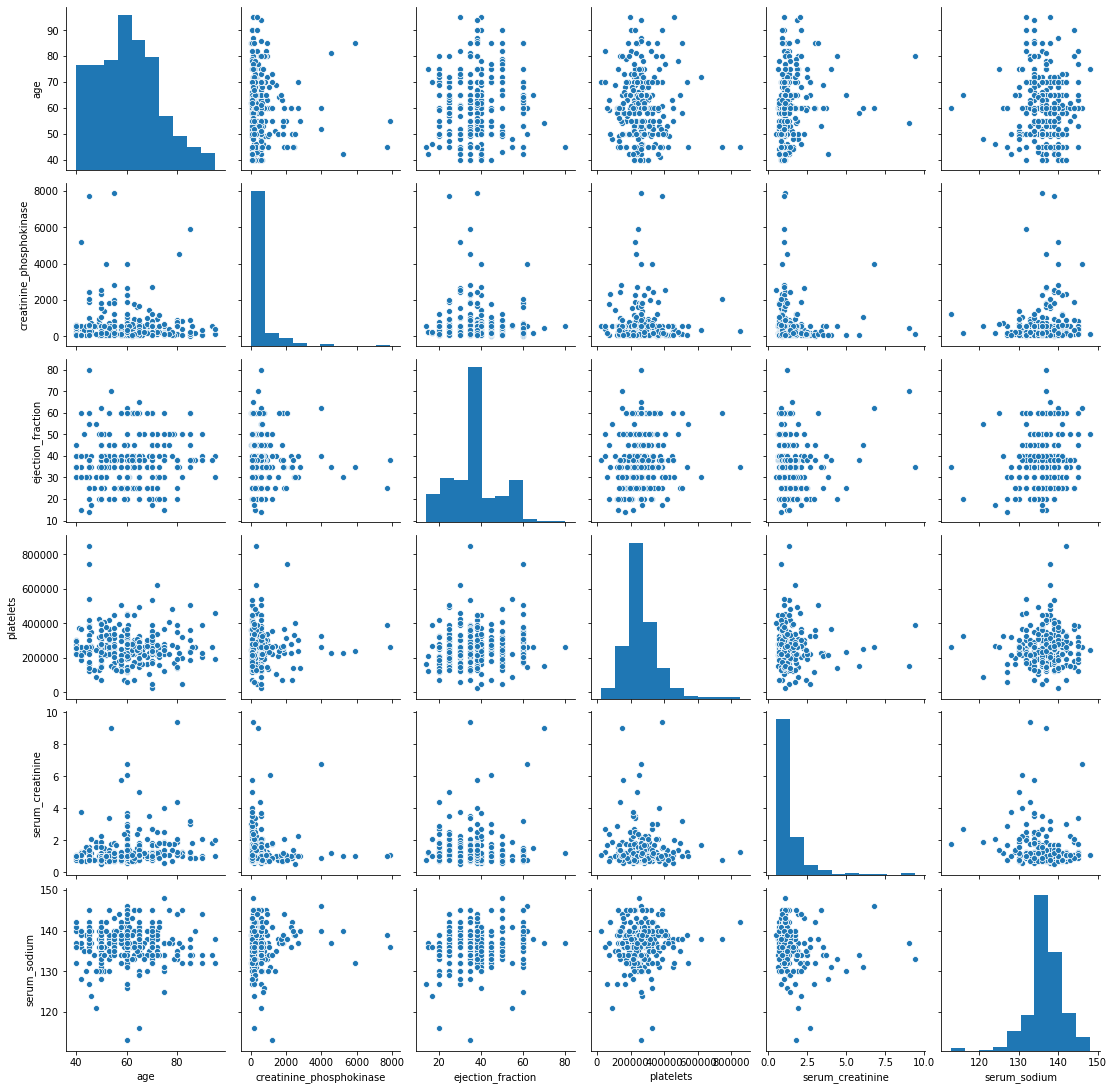

In [14]:
sns.pairplot(X)

In [15]:
###############################################################################
#                              TrainTest split method                         #
###############################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((224, 6), (224,), (75, 6), (75,))

Total training samples: 224
Total test samples: 75


<Figure size 432x288 with 0 Axes>

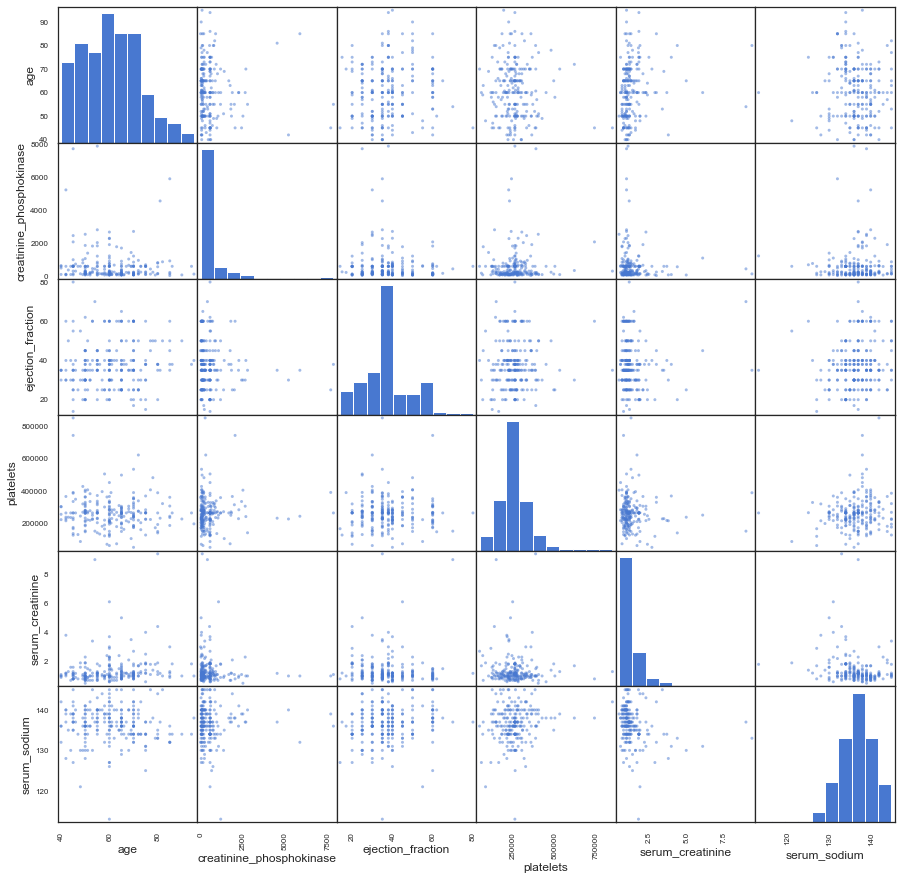

<Figure size 432x288 with 0 Axes>

In [16]:
###############################################################################
#                              Pair Plot of the Features                      #
###############################################################################
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
#from ensemble import ensemble
from sklearn.metrics import accuracy_score

%matplotlib inline

# load data 
print("Total training samples: {n}".format(n=len(X_train)))
print("Total test samples: {n}".format(n=len(X_test)))

# helper funcs
sns.set(style="white", palette="muted", color_codes=True)
def is_nan(num):
    return num != num

# This pair plot gives visibility of the features that would Support survival rate.
pd.plotting.scatter_matrix(X_train,figsize=(15,15))
plt.figure()

In [17]:
##plotly.offline.plot(data, filename = 'C:/Users/mac4m/Documents/dswp/machine_learning_examples-master/parallel_coordinates_plot_16.html', auto_open= True)

In [18]:
###############################################################################
#                               4. Scale data                                 #
###############################################################################
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################
# Initializing Support Vector classifier
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

# Initializing for KNN classifier
classifier5 = knn(n_neighbors=3)

# Initializing for XGBoost classifier
classifier6 = xgb.XGBClassifier()

In [20]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5, classifier6],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))


In [21]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "knn": classifier5,
               "xgb": classifier6,
               "Stack": sclf}

In [22]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

[13:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Accuracy: 0.7066666666666667
[[50 21]
 [ 1  3]]
f1 Score: (array([0.70422535, 0.75      ]), array([0.98039216, 0.125     ]), array([0.81967213, 0.21428571]), array([51, 24], dtype=int64))


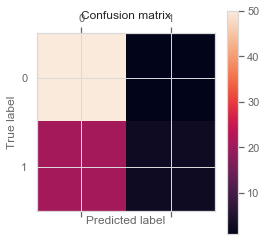

Accuracy: 0.7333333333333333
[[40  9]
 [11 15]]
f1 Score: (array([0.81632653, 0.57692308]), array([0.78431373, 0.625     ]), array([0.8, 0.6]), array([51, 24], dtype=int64))


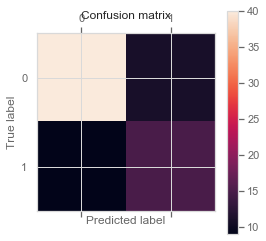

Accuracy: 0.7066666666666667
[[47 18]
 [ 4  6]]
f1 Score: (array([0.72307692, 0.6       ]), array([0.92156863, 0.25      ]), array([0.81034483, 0.35294118]), array([51, 24], dtype=int64))


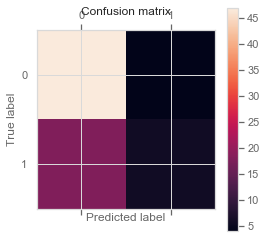

Accuracy: 0.72
[[41 11]
 [10 13]]
f1 Score: (array([0.78846154, 0.56521739]), array([0.80392157, 0.54166667]), array([0.7961165 , 0.55319149]), array([51, 24], dtype=int64))


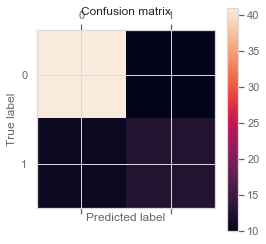

Accuracy: 0.6666666666666666
[[41 15]
 [10  9]]
f1 Score: (array([0.73214286, 0.47368421]), array([0.80392157, 0.375     ]), array([0.76635514, 0.41860465]), array([51, 24], dtype=int64))


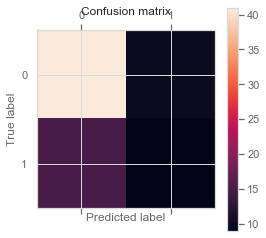

Accuracy: 0.7333333333333333
[[42 11]
 [ 9 13]]
f1 Score: (array([0.79245283, 0.59090909]), array([0.82352941, 0.54166667]), array([0.80769231, 0.56521739]), array([51, 24], dtype=int64))


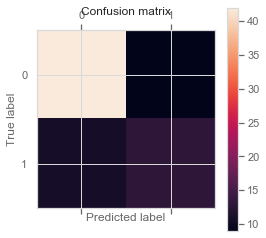

Accuracy: 0.72
[[43 13]
 [ 8 11]]
f1 Score: (array([0.76785714, 0.57894737]), array([0.84313725, 0.45833333]), array([0.80373832, 0.51162791]), array([51, 24], dtype=int64))


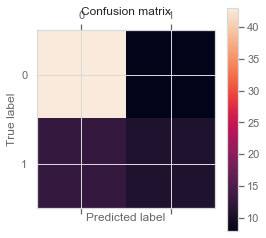

In [29]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
## run confusion matrix here
    threshold = 0.50
    y_pred1 = (classifiers[key].predict_proba(X_test)[:, 1] > threshold).astype('float')
    print ('Accuracy:', accuracy_score(y_test, y_pred1))
    print (cf(y_pred1,y_test))
    print ("f1 Score:", f1(y_test, y_pred1))

    plt.matshow(cf(y_test, y_pred1))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# Add the test set to the results object
results["Target"] = y_test



In [24]:
y_pred

array([0.55244455, 0.21734774, 0.21549691, 0.21238506, 0.20131274,
       0.52119553, 0.25262248, 0.20838692, 0.60431301, 0.31884601,
       0.21158222, 0.57125478, 0.21393909, 0.20594616, 0.44718862,
       0.30272045, 0.51339583, 0.53977508, 0.59173906, 0.21663221,
       0.263015  , 0.20356362, 0.22157247, 0.29041557, 0.3755549 ,
       0.56187171, 0.21938679, 0.21738258, 0.19486812, 0.21876494,
       0.211627  , 0.2221176 , 0.20678597, 0.26379728, 0.21388187,
       0.20744147, 0.26846493, 0.59782368, 0.21938424, 0.28868573,
       0.21589773, 0.20180685, 0.20714044, 0.21432675, 0.33099546,
       0.55863759, 0.34399441, 0.45156251, 0.3367134 , 0.25557698,
       0.21663692, 0.2143782 , 0.57347076, 0.61772076, 0.27865341,
       0.21751991, 0.21557855, 0.21545815, 0.6232129 , 0.21015301,
       0.21918096, 0.21835026, 0.54115968, 0.52374552, 0.2178854 ,
       0.20748297, 0.21937185, 0.21075057, 0.57756225, 0.52394738,
       0.63119135, 0.21803007, 0.21818988, 0.25445754, 0.53943

In [25]:
y_pred

array([0.55244455, 0.21734774, 0.21549691, 0.21238506, 0.20131274,
       0.52119553, 0.25262248, 0.20838692, 0.60431301, 0.31884601,
       0.21158222, 0.57125478, 0.21393909, 0.20594616, 0.44718862,
       0.30272045, 0.51339583, 0.53977508, 0.59173906, 0.21663221,
       0.263015  , 0.20356362, 0.22157247, 0.29041557, 0.3755549 ,
       0.56187171, 0.21938679, 0.21738258, 0.19486812, 0.21876494,
       0.211627  , 0.2221176 , 0.20678597, 0.26379728, 0.21388187,
       0.20744147, 0.26846493, 0.59782368, 0.21938424, 0.28868573,
       0.21589773, 0.20180685, 0.20714044, 0.21432675, 0.33099546,
       0.55863759, 0.34399441, 0.45156251, 0.3367134 , 0.25557698,
       0.21663692, 0.2143782 , 0.57347076, 0.61772076, 0.27865341,
       0.21751991, 0.21557855, 0.21545815, 0.6232129 , 0.21015301,
       0.21918096, 0.21835026, 0.54115968, 0.52374552, 0.2178854 ,
       0.20748297, 0.21937185, 0.21075057, 0.57756225, 0.52394738,
       0.63119135, 0.21803007, 0.21818988, 0.25445754, 0.53943

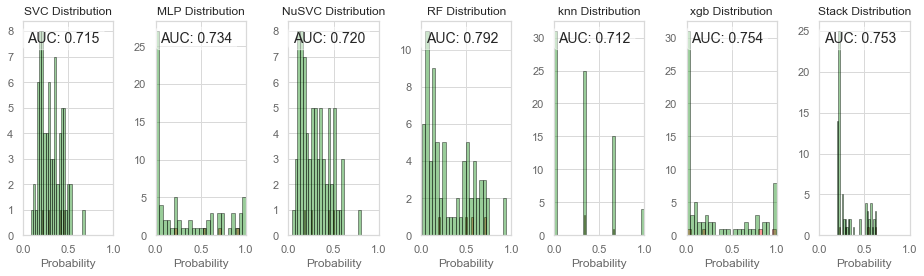

In [26]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 7)

for key, counter in zip(classifiers, range(7)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [27]:
###############################################################################
#                         11. Tuning the Meta-Classifier                      #
###############################################################################
# Define parameter grid 
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.3min finished


[14:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [28]:
###############################################################################
#               12. Stacking Different Combinations of Classifiers            #
###############################################################################
# Classifier labels
classifier_labels = ["SVC", "MLP", "NuSVC", "RF", "knn", "xgb"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 5,
                                meta_classifier = SVC(probability = True),
                                n_jobs = -1)
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 5,
                        scoring = "roc_auc",
                        verbose = 0,
                        n_jobs = -1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

AUC of stack ('SVC', 'MLP'): 0.736
AUC of stack ('SVC', 'NuSVC'): 0.666
AUC of stack ('SVC', 'RF'): 0.728
AUC of stack ('SVC', 'knn'): 0.734
AUC of stack ('SVC', 'xgb'): 0.736
AUC of stack ('MLP', 'NuSVC'): 0.736
AUC of stack ('MLP', 'RF'): 0.736
AUC of stack ('MLP', 'knn'): 0.737
AUC of stack ('MLP', 'xgb'): 0.736
AUC of stack ('NuSVC', 'RF'): 0.737
AUC of stack ('NuSVC', 'knn'): 0.736
AUC of stack ('NuSVC', 'xgb'): 0.687
AUC of stack ('RF', 'knn'): 0.738
AUC of stack ('RF', 'xgb'): 0.737
AUC of stack ('knn', 'xgb'): 0.737
AUC of stack ('SVC', 'MLP', 'NuSVC'): 0.737
AUC of stack ('SVC', 'MLP', 'RF'): 0.737
AUC of stack ('SVC', 'MLP', 'knn'): 0.737
AUC of stack ('SVC', 'MLP', 'xgb'): 0.737
AUC of stack ('SVC', 'NuSVC', 'RF'): 0.733
AUC of stack ('SVC', 'NuSVC', 'knn'): 0.740
AUC of stack ('SVC', 'NuSVC', 'xgb'): 0.736
AUC of stack ('SVC', 'RF', 'knn'): 0.737
AUC of stack ('SVC', 'RF', 'xgb'): 0.741
AUC of stack ('SVC', 'knn', 'xgb'): 0.737
AUC of stack ('MLP', 'NuSVC', 'RF'): 0.738
AUC